In [2]:
%matplotlib inline
from scipy import stats
from pathlib import Path
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib as mpl


# Original Data
source : https://datos.cdmx.gob.mx/dataset/afluencia-diaria-del-metro-cdmx

In [4]:
metro_data = pd.read_csv("afluenciastc_simple_12_2022.csv", encoding='latin')
print(metro_data.head())

        fecha  anio    mes    linea             estacion  afluencia
0  2010-01-01  2010  Enero  Linea 1             Zaragoza      20227
1  2010-01-01  2010  Enero  Linea 1  Isabel la CatÃ³lica       6487
2  2010-01-01  2010  Enero  Linea 1            Moctezuma      10304
3  2010-01-01  2010  Enero  Linea 1         Pino SuÃ¡rez       8679
4  2010-01-01  2010  Enero  Linea 1       GÃ³mez FarÃ­as      19499


# Organizing Data

In [5]:
metro_data.rename(columns={'fecha': 'date', 'anio': 'year', 'afluencia': 'influx'}, inplace=True)
metro_data['date'] = pd.to_datetime(metro_data['date'])

#Grouping by month
final_metro_df = metro_data.groupby(pd.Grouper(key='date', freq='M')).sum("influx")
final_metro_df.drop('year', inplace=True, axis=1)

#Importing as a daily Time Series 
ts = pd.read_csv('afluenciastc_simple_12_2022.csv', parse_dates=['fecha'], index_col='fecha',encoding='latin')
ts.rename(columns={'fecha': 'date', 'anio': 'year', 'afluencia': 'influx'}, inplace=True)
#print(ts.head())
final_ts = ts.groupby("fecha").sum("influx")
final_ts.drop('year', inplace=True, axis=1)


#print(metro_data.head())
#print(final_metro_df)
print(final_ts)




             influx
fecha              
2010-01-01  1511363
2010-01-02  2633052
2010-01-03  2216448
2010-01-04  4085108
2010-01-05  4164143
...             ...
2022-12-27  2601231
2022-12-28  2729371
2022-12-29  2680794
2022-12-30  2670616
2022-12-31  1792434

[4748 rows x 1 columns]


# Measures of centrality (Mean, Median)


In [28]:
metro_influx = final_metro_df["influx"]
#Getting the mean of the dataframe, however it is not entirely correct
mean = metro_influx.mean()
#Median
median = metro_influx.median()
print(f"Mean =","{:,}".format(mean))
print("Median =","{:,}".format(median))

Mean = 121,128,782.85897435
Median = 132,571,193.5


# Measures of variability (STD, IQR, MAD)

In [30]:
#Standard Deviation
standard_deviation = metro_influx.std()
#Interquartile range
IQR = metro_influx.quantile(0.75) - metro_influx.quantile(0.25)
#Median Absolute Deviation (MAD)
MAD = robust.scale.mad(metro_influx)
print(f"Standard Deviation =""{:,}".format(standard_deviation))
print(f"IQR =""{:,}".format(IQR))
print("MAD =","{:,}".format(MAD))


Standard Deviation =27,891,203.083827756
IQR =15,642,285.25
MAD = 10,127,838.855985753


# Exploring data (Boxplot, Histogram)

(134915045.667, 144816573.333]    51
(125013518.0, 134915045.667]      50
(144816573.333, 154718101.0]      10
(65604352.0, 75505879.667]         9
(115111990.333, 125013518.0]       9
(85407407.333, 95308935.0]         8
(55702824.333, 65604352.0]         6
(75505879.667, 85407407.333]       5
(35780950.668, 45801296.667]       4
(105210462.667, 115111990.333]     2
(45801296.667, 55702824.333]       1
(95308935.0, 105210462.667]        1
Name: influx, dtype: int64


Text(0, 0.5, 'Monthly influx of people (millions)')

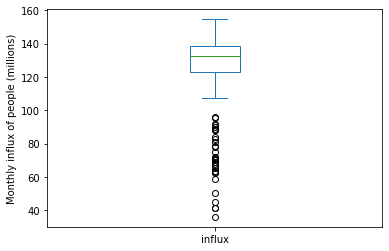

In [32]:
#metro_influx.quantile([0.05,0.25,0.5,0.75,0.95])
binnedInflux = pd.cut(metro_influx, 12)
print(binnedInflux.value_counts())
boxplot = (metro_influx/1000000).plot.box()
boxplot.set_ylabel("Monthly influx of people (millions)")

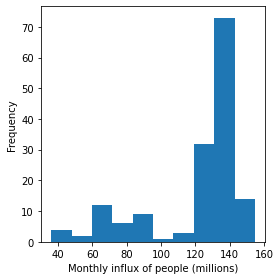

In [33]:
ax = (metro_influx / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Monthly influx of people (millions)')

plt.tight_layout()
plt.show()


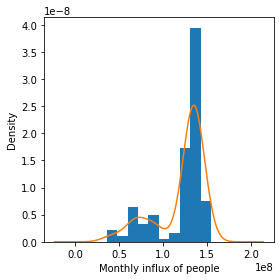

In [34]:
ax = metro_influx.plot.hist(density=True,  
                                     figsize=(4, 4))
metro_influx.plot.density(ax=ax)
ax.set_xlabel('Monthly influx of people')

plt.tight_layout()
plt.show()

 # Visualizing as a Time Series
 

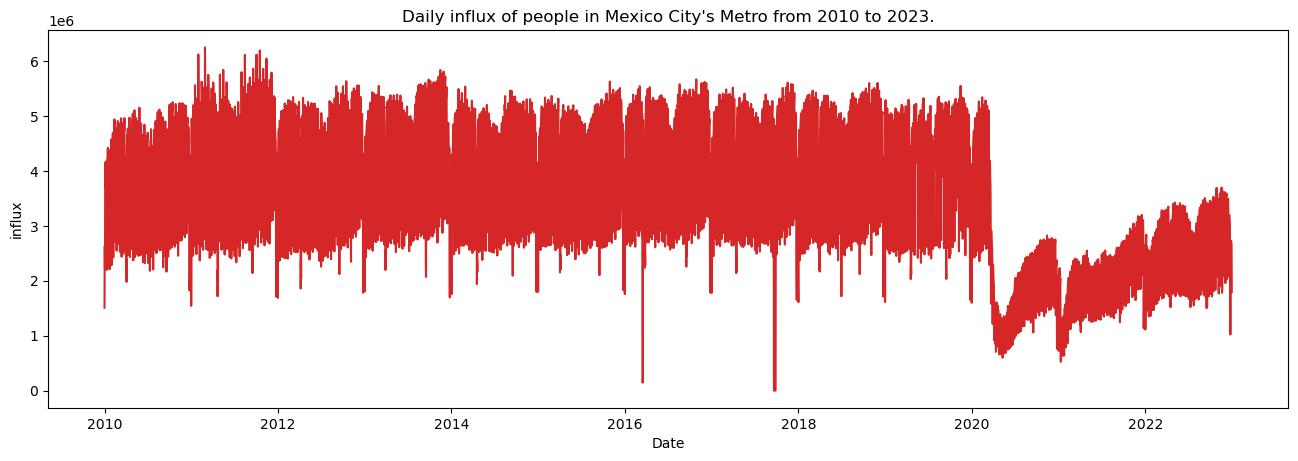

In [24]:
ts = pd.read_csv('afluenciastc_simple_12_2022.csv', parse_dates=['fecha'], index_col='fecha',encoding='latin')
ts.rename(columns={'fecha': 'date', 'anio': 'year', 'afluencia': 'influx'}, inplace=True)
#print(ts.head())
final_ts = ts.groupby("fecha").sum("influx")
final_ts.drop('year', inplace=True, axis=1)
plot_df(final_ts, x=final_ts.index, y=final_ts.influx, title='Daily influx of people in Mexico City\'s Metro from 2010 to 2023.')


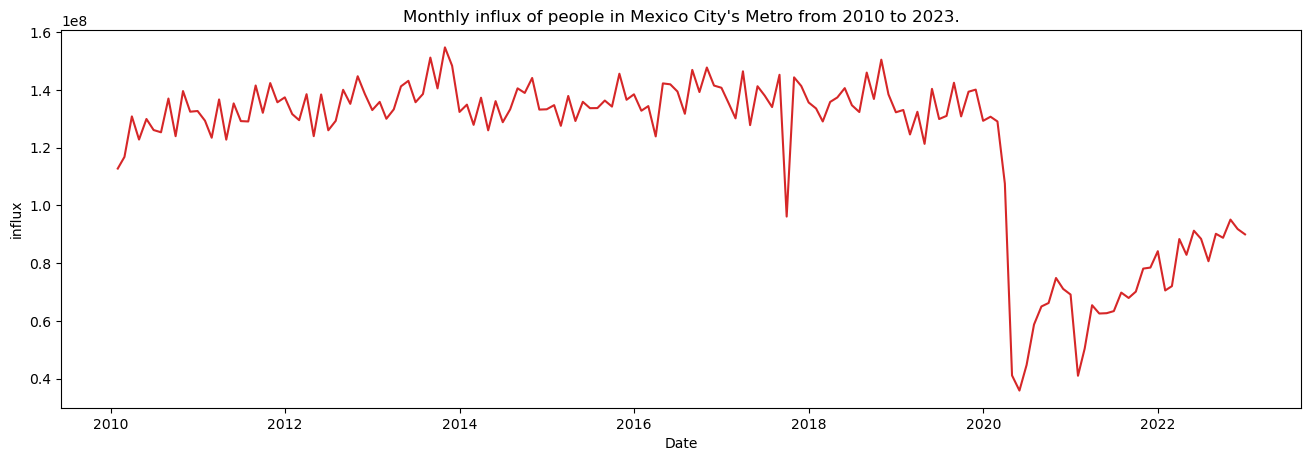

In [21]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='influx', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

#plot_df(df, x=df.index, y=df.influx, title='Influx of people in Metro from 2010 to 2023.')    
plot_df(final_metro_df, x=final_metro_df.index, y=final_metro_df.influx, title='Monthly influx of people in Mexico City\'s Metro from 2010 to 2023.')    

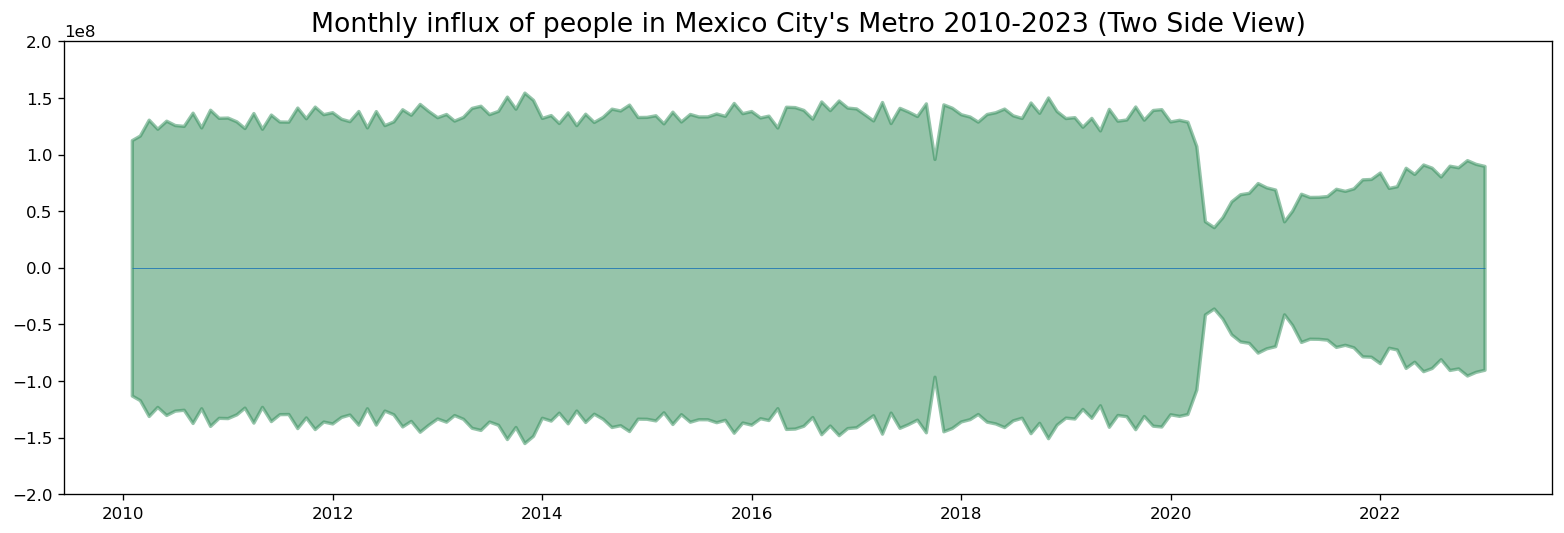

In [18]:
x = final_metro_df.index
y1 = final_metro_df['influx'].values
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-2e8, 2e8)
plt.title('Monthly influx of people in Mexico City\'s Metro 2010-2023 (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(final_metro_df.index), xmax=np.max(final_metro_df.index), linewidth=.5)
plt.show()

# Seasonal plot

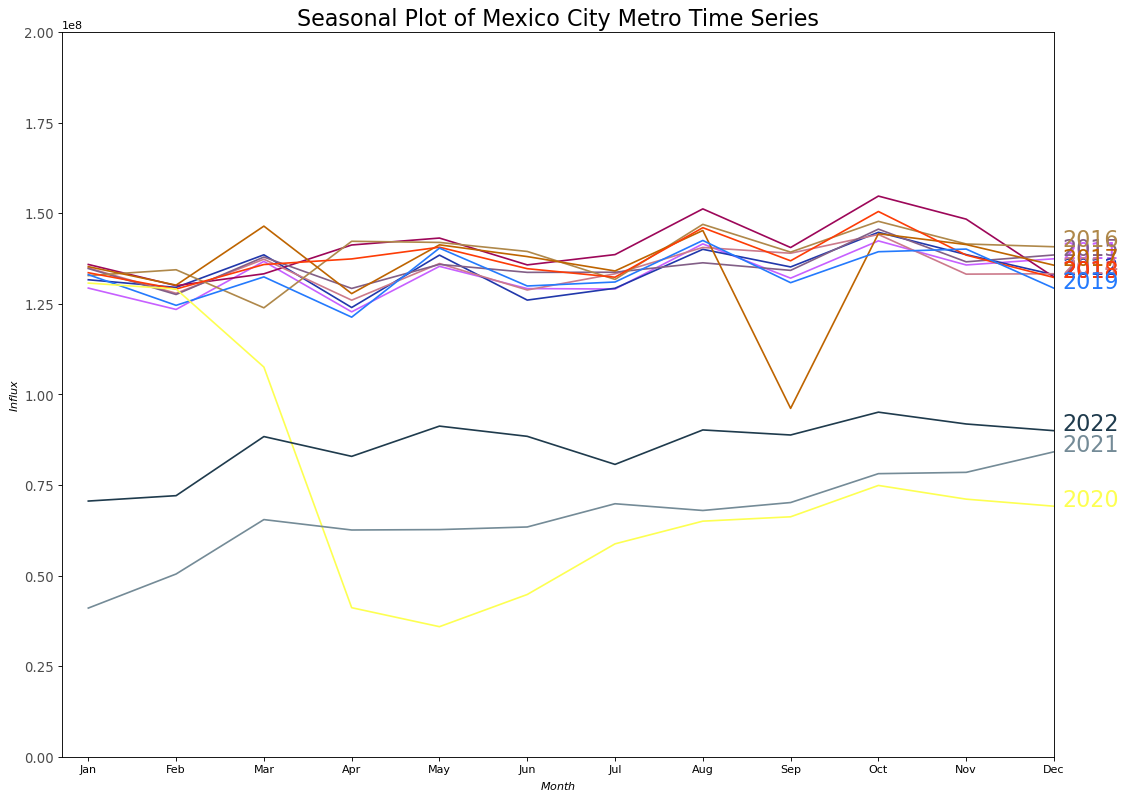

In [16]:
final_metro_df["date"] = final_metro_df.index
df = final_metro_df
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'influx', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'influx'][-1:].values[0], y, fontsize=20, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(0, 2e8), ylabel='$Influx$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Mexico City\'s Metro Time Series", fontsize=20)
plt.show()

# Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution


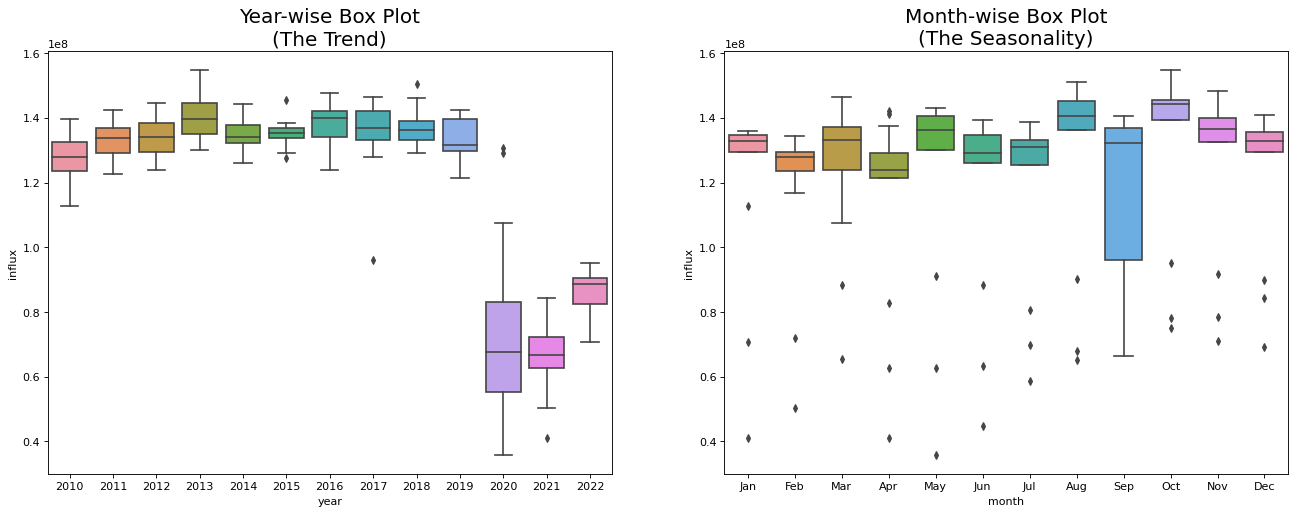

In [20]:
final_metro_df["date"] = final_metro_df.index
df = final_metro_df
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='influx', data=df, ax=axes[0])
sns.boxplot(x='month', y='influx', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

# Decomposing the Time Series

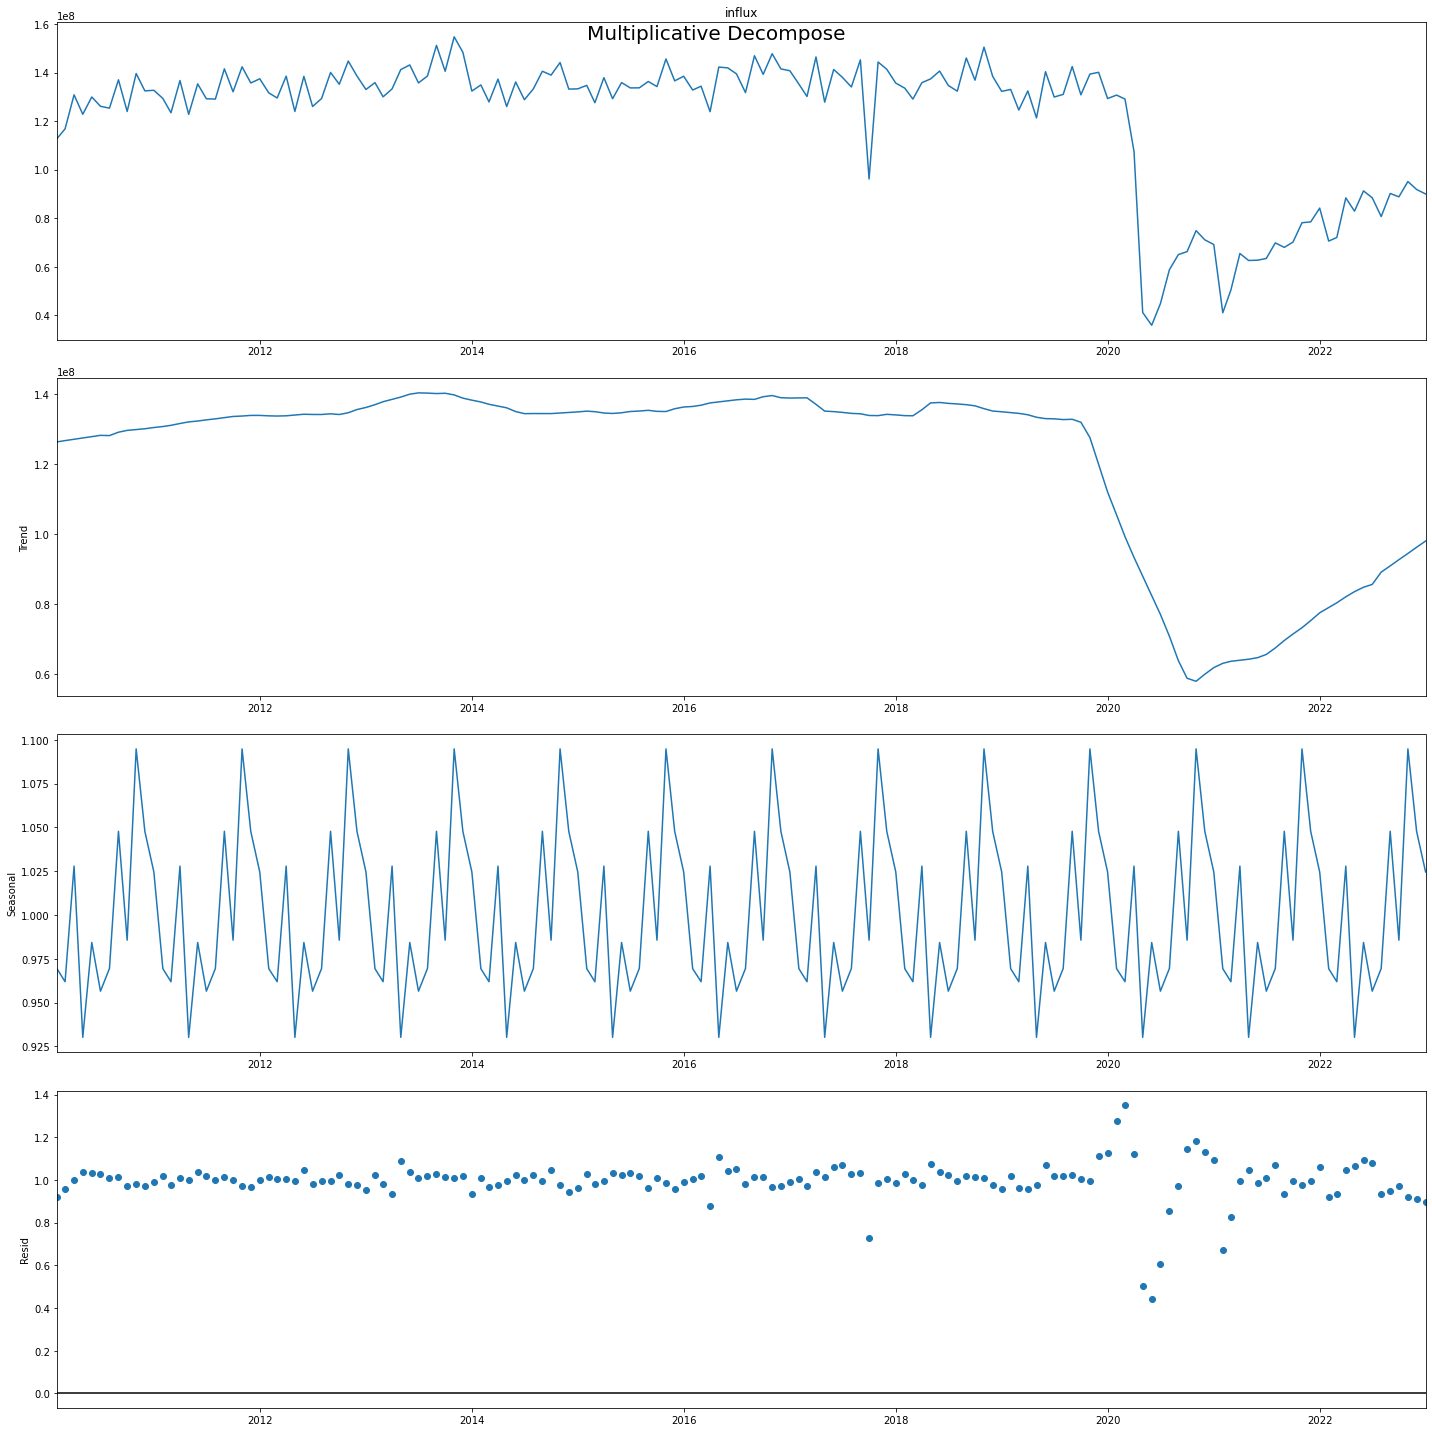

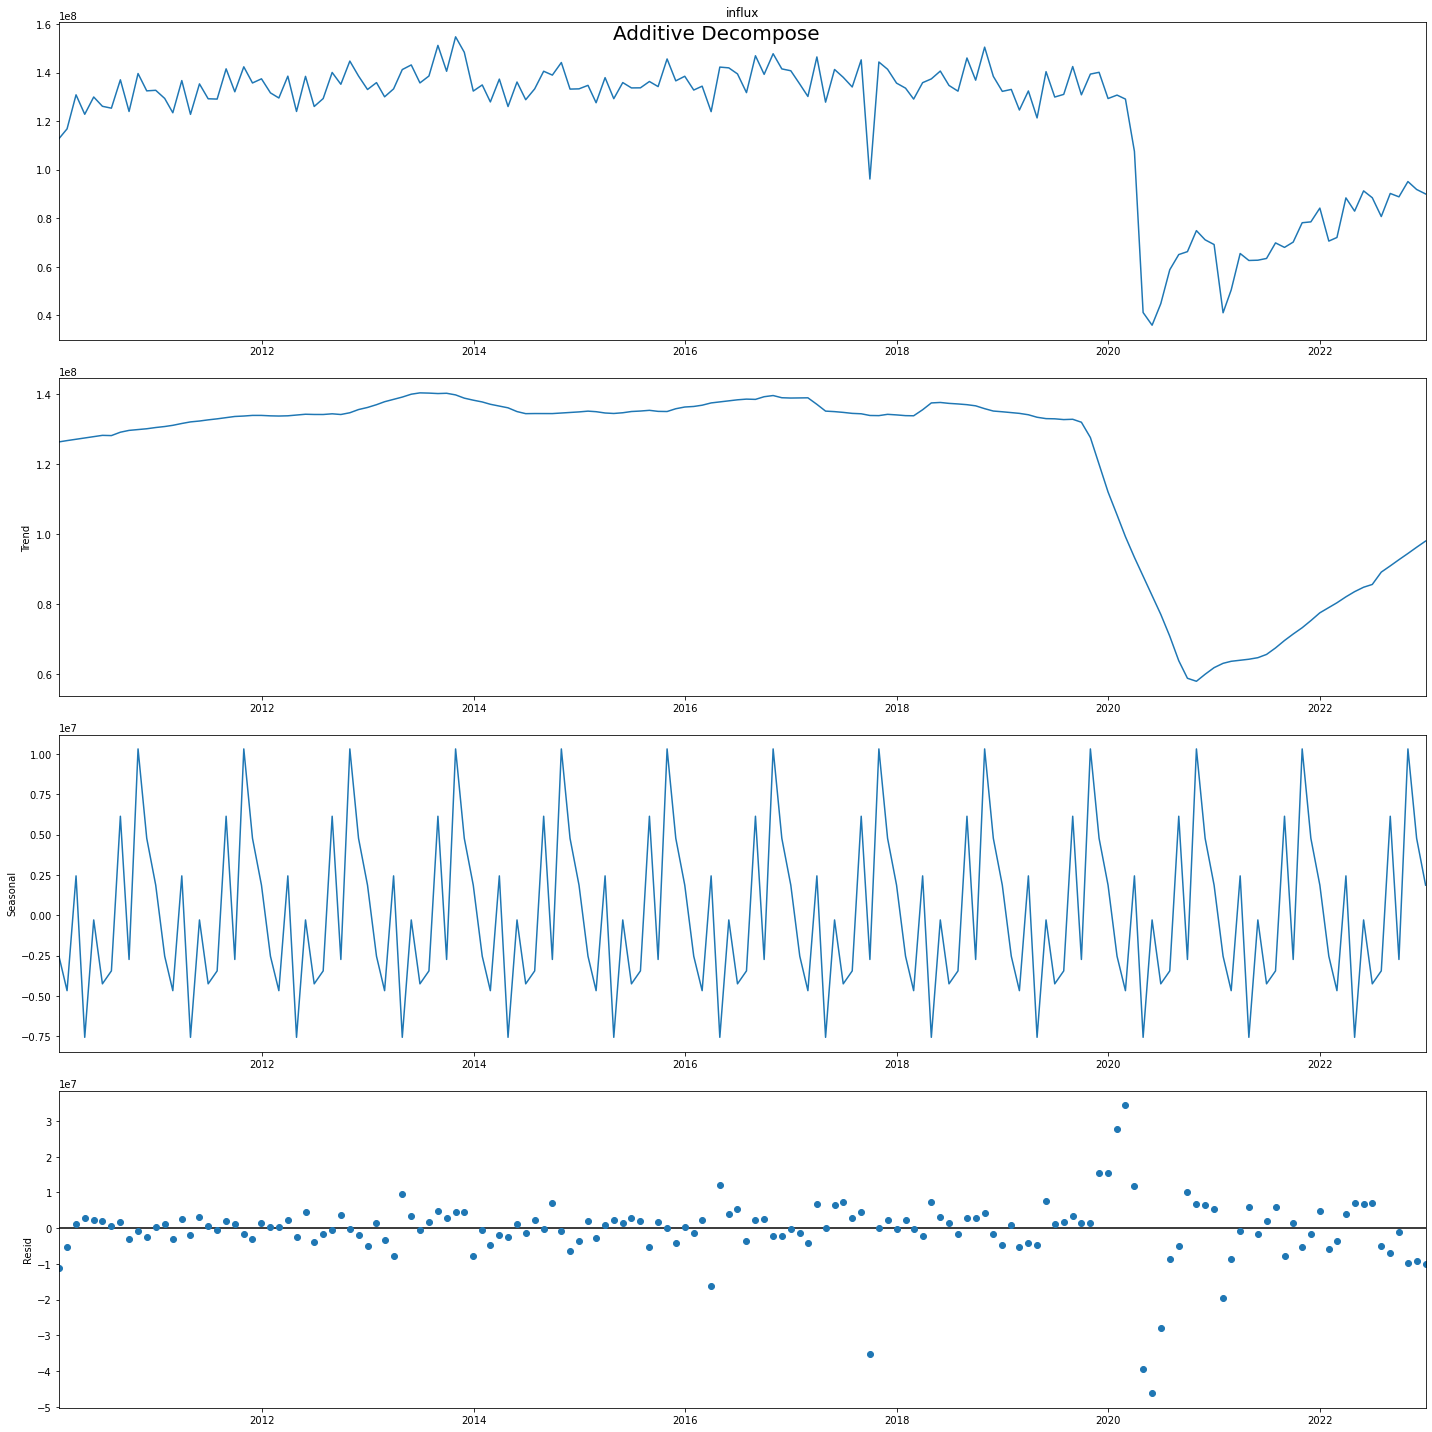

,seas,trend,resid,actual_values
date,,,,
2010-01-31,0.969335,1.264026e+08,0.920283,112758984.0
2010-02-28,0.961884,1.267775e+08,0.957822,116801824.0
2010-03-31,1.027896,1.271524e+08,1.000941,130822416.0
2010-04-30,0.930117,1.275272e+08,1.035361,122809642.0
2010-05-31,0.984280,1.279021e+08,1.032072,129929033.0


In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
final_metro_df["date"] = final_metro_df.index
df = final_metro_df
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['influx'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['influx'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (20,20)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=20)
result_add.plot().suptitle('Additive Decompose', fontsize=20)
plt.show()
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

It is an additive time series

# Testing Stationarity 

In [40]:
from statsmodels.tsa.stattools import adfuller, kpss
final_metro_df["date"] = final_metro_df.index
df = final_metro_df
# ADF Test
result = adfuller(df.influx.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.influx.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.1969122906255938
p-value: 0.6749225541043621
Critial Values:
   1%, -3.4769274060112707
Critial Values:
   5%, -2.8819726324025625
Critial Values:
   10%, -2.577665408088415

KPSS Statistic: 0.935104
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/home/adriangtzg/anaconda3/envs/SFDS/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


It is non-stationary, because KPSS P-Value < 0.05 and ADF P-Value > 0.05

# Detrending the Time Series

Text(0.5, 1.0, 'Influx detrended by subtracting the least squares fit')

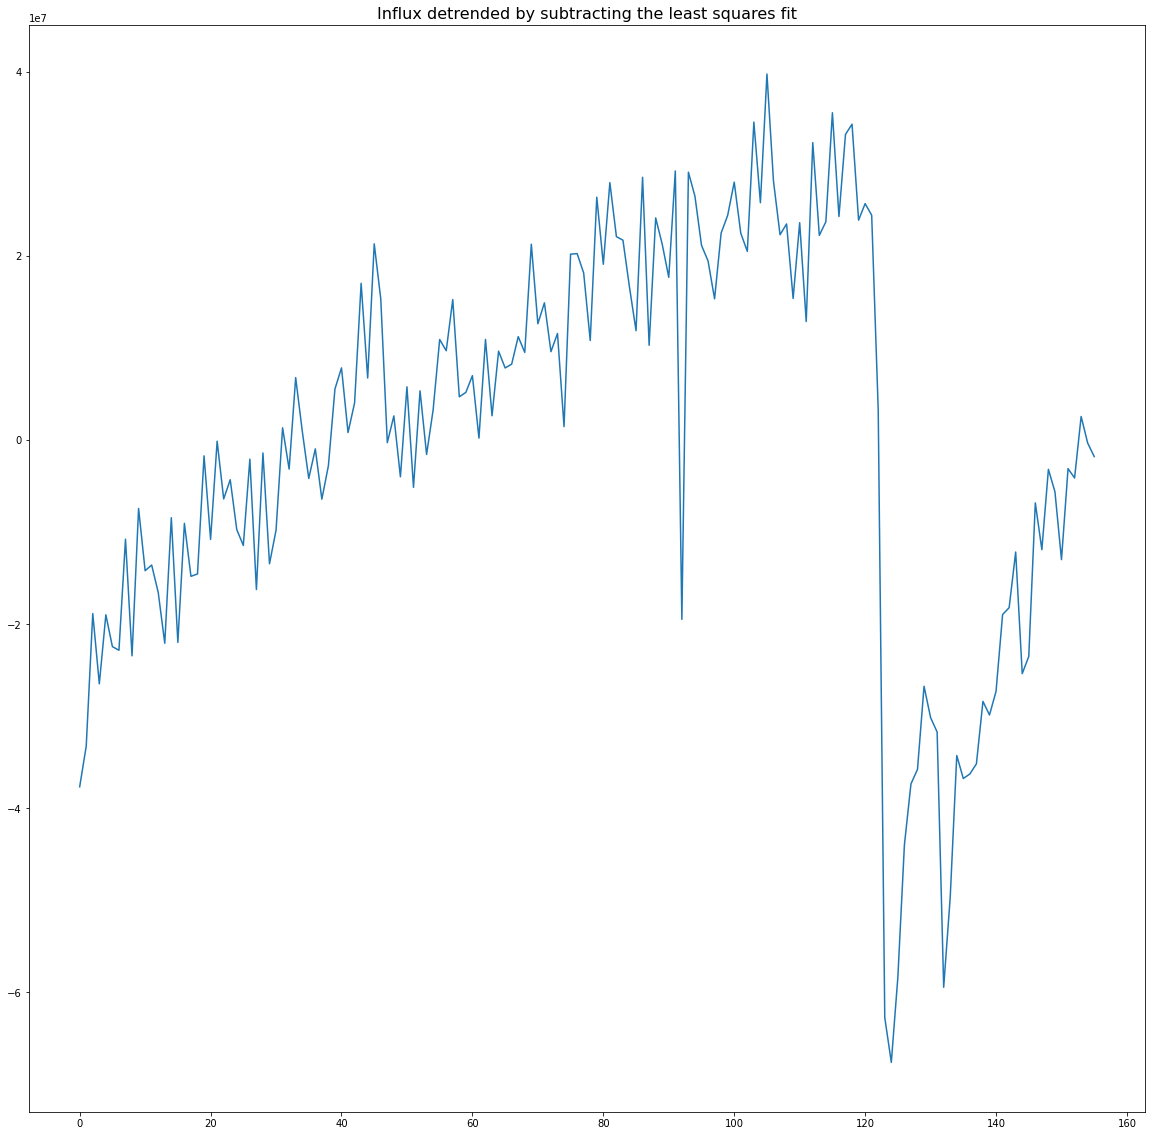

In [42]:
# Using scipy: Subtract the line of best fit
from scipy import signal
final_metro_df["date"] = final_metro_df.index
df = final_metro_df
detrended = signal.detrend(df.influx.values)
plt.plot(detrended)
plt.title('Influx detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Influx detrended by subtracting the trend component')

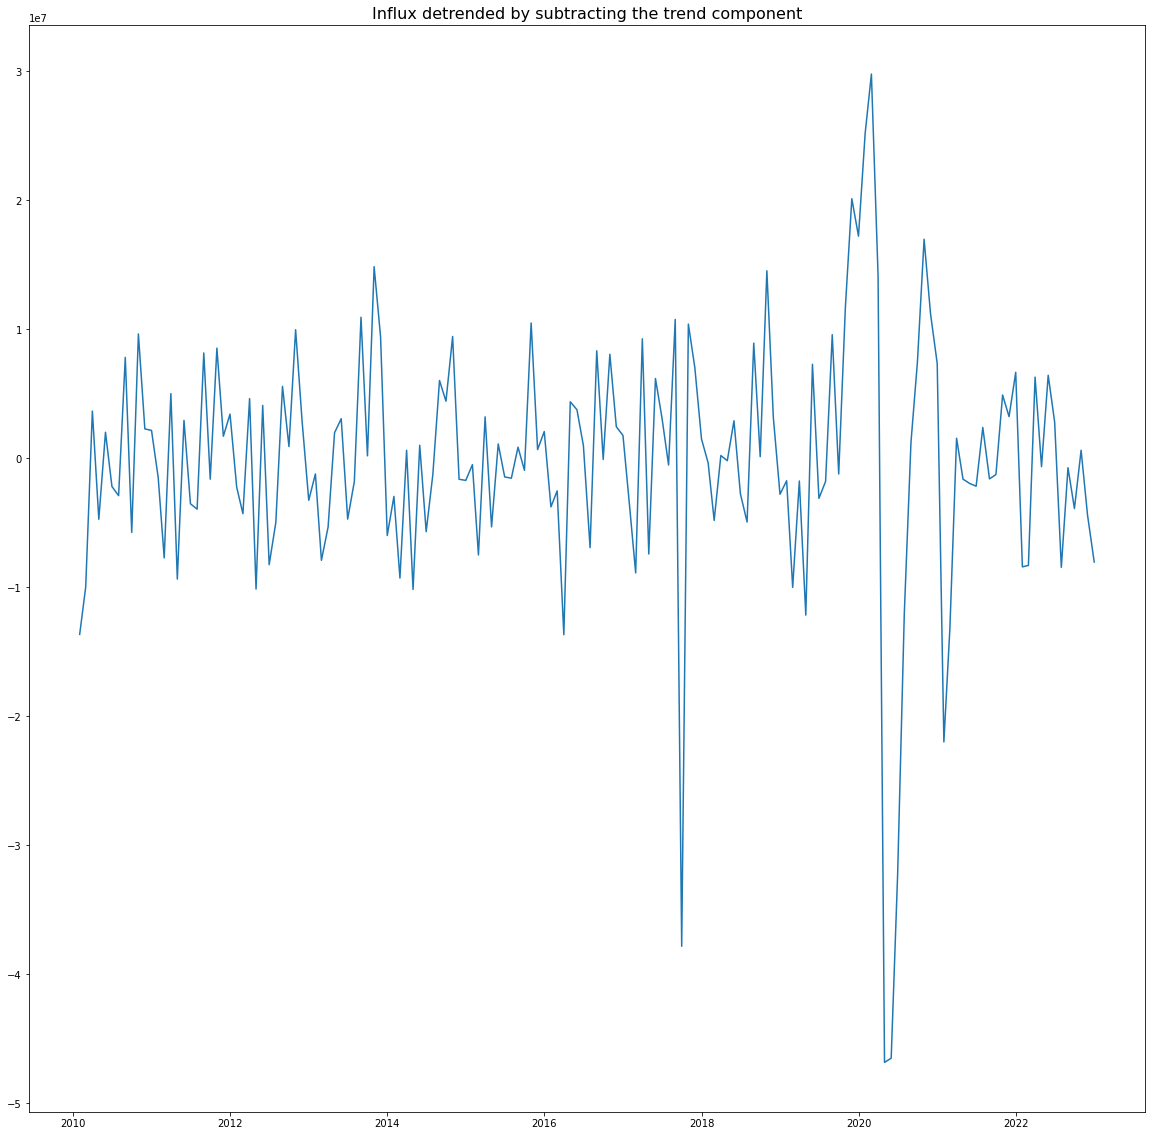

In [46]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
final_metro_df["date"] = final_metro_df.index
df = final_metro_df
result_mul = seasonal_decompose(df['influx'], model='additive', extrapolate_trend='freq')
detrended = df.influx.values - result_mul.trend
plt.plot(detrended)
plt.title('Influx detrended by subtracting the trend component', fontsize=16)

# Deseasonalizing 

[]

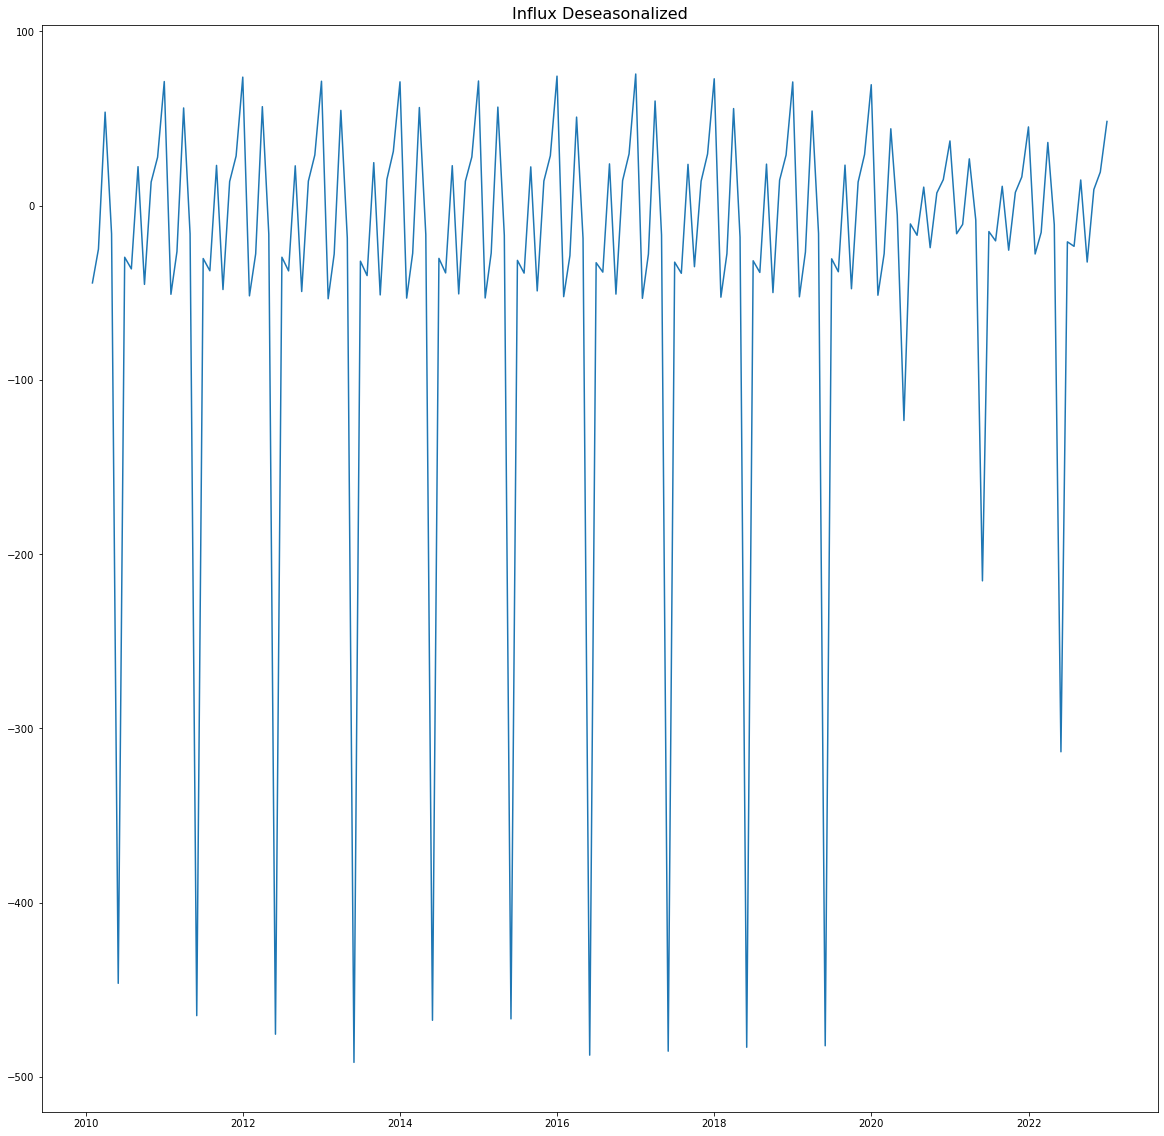

In [49]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
final_metro_df["date"] = final_metro_df.index
df = final_metro_df
result_mul = seasonal_decompose(df['influx'], model='aditive', extrapolate_trend='freq')
# Deseasonalize
deseasonalized = df.influx.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Influx Deseasonalized', fontsize=16)
plt.plot()

# Autocorrelation Plot

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

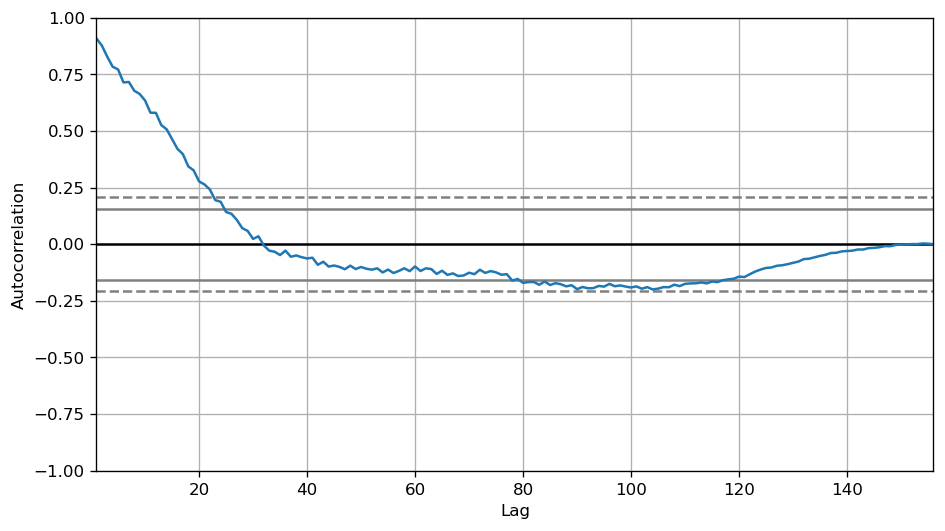

In [50]:
from pandas.plotting import autocorrelation_plot
final_metro_df["date"] = final_metro_df.index
df = final_metro_df
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.influx.tolist())

/home/adriangtzg/anaconda3/envs/SFDS/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


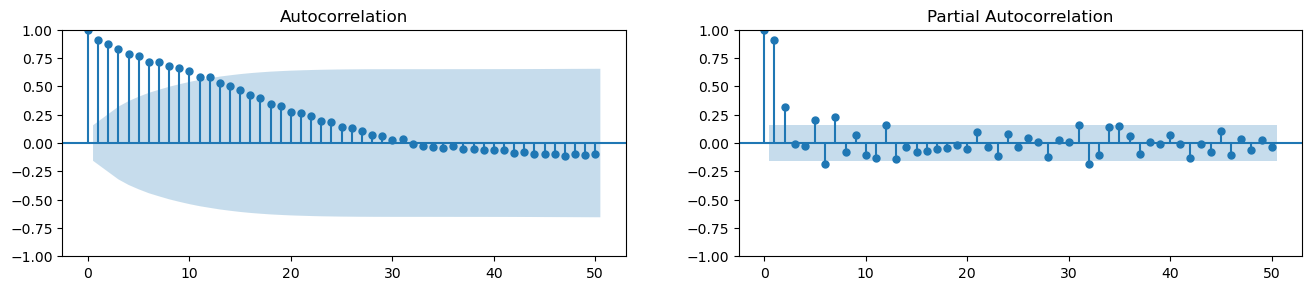

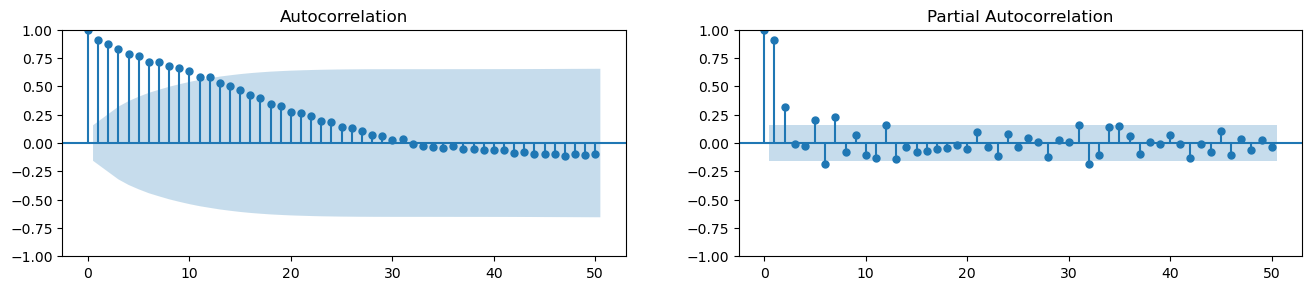

In [51]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
final_metro_df["date"] = final_metro_df.index
df = final_metro_df

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.influx.tolist(), lags=50, ax=axes[0])
plot_pacf(df.influx.tolist(), lags=50, ax=axes[1])

Positive correlation between months 1, 2, 3, 6, 8

# Lag Plots

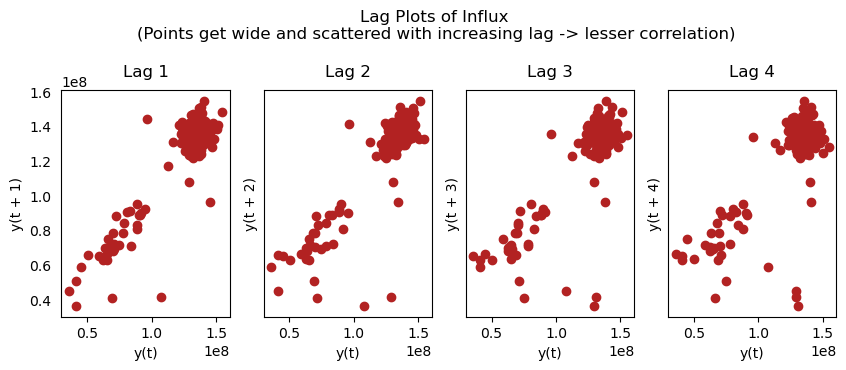

In [52]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})
final_metro_df["date"] = final_metro_df.index
df = final_metro_df

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df.influx, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Influx \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    
    
plt.show()

# Smoothening the Time Series

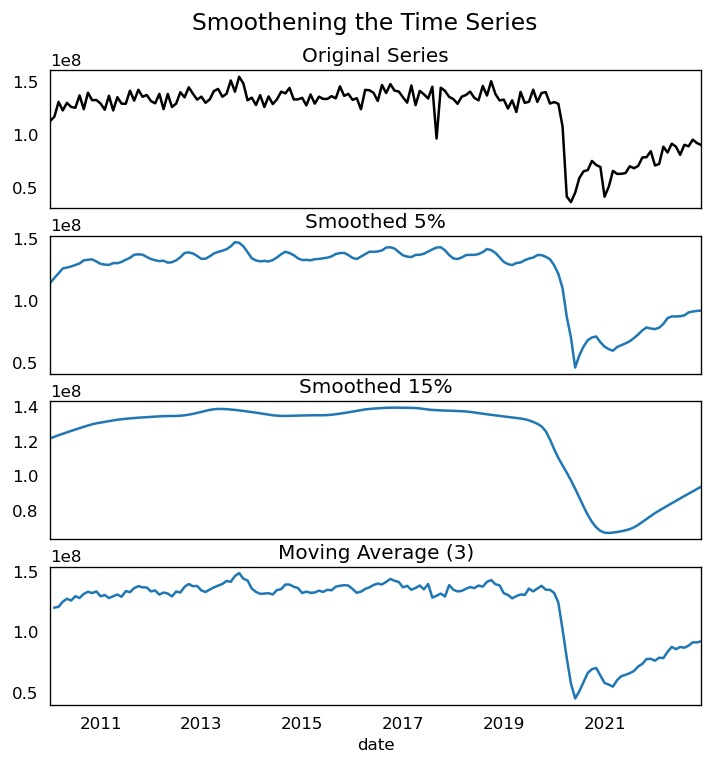

In [54]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
final_metro_df["date"] = final_metro_df.index
df_orig = final_metro_df

# 1. Moving Average
df_ma = df_orig.influx.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.influx, np.arange(len(df_orig.influx)), frac=0.05)[:, 1], index=df_orig.index, columns=['influx'])
df_loess_15 = pd.DataFrame(lowess(df_orig.influx, np.arange(len(df_orig.influx)), frac=0.15)[:, 1], index=df_orig.index, columns=['influx'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['influx'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['influx'].plot(ax=axes[1], title='Smoothed 5%')
df_loess_15['influx'].plot(ax=axes[2], title='Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('Smoothening the Time Series', y=0.95, fontsize=14)
plt.show()

# Forecasting using ARIMA

In [126]:
from statsmodels.tsa.arima.model import ARIMA
final_metro_df["date"] = final_metro_df.index
df = final_metro_df

df_train = df.influx[:85]
df_test = df.influx[85:]
model = ARIMA(df_train, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:                 influx   No. Observations:                   85
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1456.577
Date:                Sun, 22 Jan 2023   AIC                           2919.154
Time:                        23:22:48   BIC                           2926.446
Sample:                    01-31-2010   HQIC                          2922.085
                         - 01-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1211      0.018     -6.683      0.000      -0.157      -0.086
ar.L2          0.1457      0.071      2.041      0.041       0.006       0.286
sigma2      3.969e+13   3.98e-16   9.97e+28      0.0

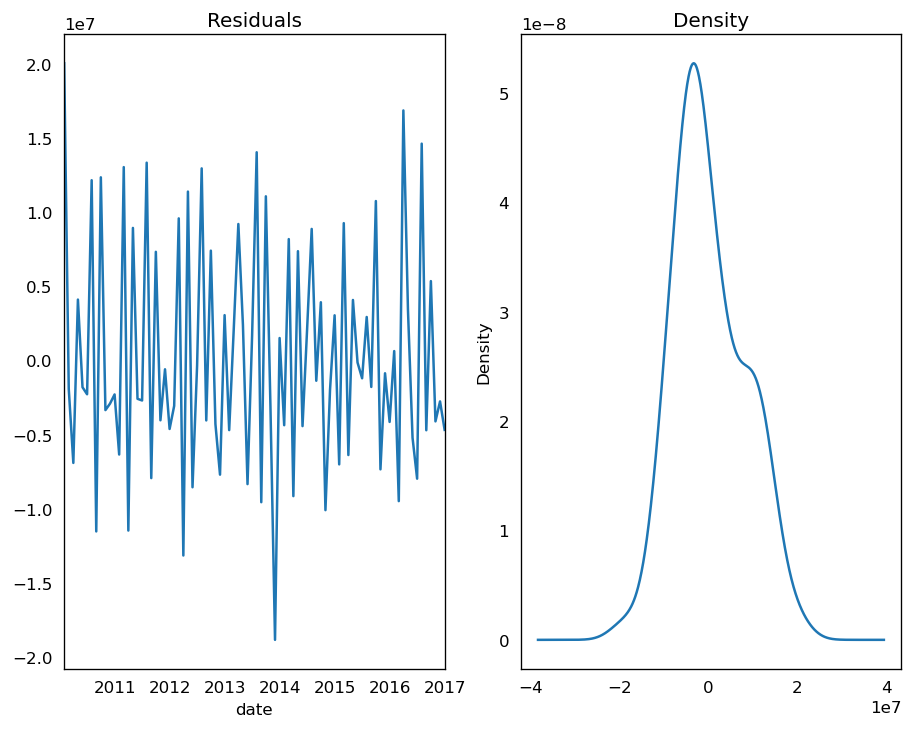

In [125]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

In [128]:
import pmdarima as pm
final_metro_df["date"] = final_metro_df.index
df = final_metro_df

df_train = df.influx[:85]
df_test = df.influx[85:]
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True)

In [134]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
#df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

df.plot()

AttributeError: 'Series' object has no attribute 'date'

In [133]:
final_metro_df["date"] = final_metro_df.index
df = final_metro_df

df_train = df.influx[:85]
df_test = df.influx[85:]
print(len(df_test)

date
2017-02-28    130144281
2017-03-31    146425638
2017-04-30    127804398
2017-05-31    141264304
2017-06-30    138025748
                ...    
2022-08-31     90184617
2022-09-30     88794502
2022-10-31     95094480
2022-11-30     91831197
2022-12-31     89981293
Freq: M, Name: influx, Length: 71, dtype: int64
